### ANL252 Python for Data Analytics - TMA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (b)

#### Read the data and create the same two (2) charts and their corresponding summarised tables produced in Part (a), using Python. 

In [2]:
#read data
tmadf = pd.read_csv('TMA_Data.csv')

In [3]:
#print columns & datatypes
print(tmadf.columns)
tmadf.dtypes

Index(['ID', 'Staff', 'BirthYear', 'Gender', 'Marital', 'Citizenship',
       'Minority', 'JoinDate', 'LeftDate', 'Unit', 'Salary',
       'PerformanceScore', 'Survey', 'Satisfaction', 'Absence'],
      dtype='object')


ID                    int64
Staff                object
BirthYear            object
Gender               object
Marital              object
Citizenship          object
Minority             object
JoinDate             object
LeftDate             object
Unit                 object
Salary                int64
PerformanceScore     object
Survey              float64
Satisfaction          int64
Absence               int64
dtype: object

### Bar Chart

In [4]:
#replace and group scores to status
tmadf['Satisfaction'] = tmadf['Satisfaction'].apply(str)
tmadf['Satisfaction'].replace("1", "Not Satis", inplace = True)
tmadf['Satisfaction'].replace("2", "Not Satis", inplace = True)
tmadf['Satisfaction'].replace("3", "Neutral", inplace = True)
tmadf['Satisfaction'].replace("4", "Satis", inplace = True)
tmadf['Satisfaction'].replace("5", "Satis", inplace = True)

In [5]:
#create x axis
satis = ['Satis', 'Neutral', 'Not Satis']
x_axis = np.arange(len(satis))
print(x_axis)

[0 1 2]


In [6]:
#assign status 
y_satis = tmadf['Satisfaction'] == 'Satis'
y_neutral = tmadf['Satisfaction'] == 'Neutral'
y_notsatis = tmadf['Satisfaction'] == 'Not Satis'

In [7]:
#create y axis
y_axis = [y_satis.sum(),y_neutral.sum(),y_notsatis.sum()]
y_axis

[161, 84, 5]

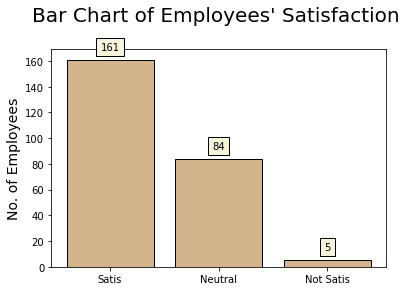

In [8]:
#plot bar chart
plt.bar(x_axis,y_axis,color="tan", edgecolor="black")
plt.title("Bar Chart of Employees' Satisfaction \n", fontsize = 20)
plt.xticks(x_axis,satis)
plt.ylabel("No. of Employees", fontsize = 14)
for x,y in zip(x_axis,y_axis):
    label = y
    plt.annotate(label, #text
                 (x,y), #coordinates to position the label
                 textcoords="offset points", #position text
                 xytext=(0,10), #distance from text to points (x,y)
                 ha='center',bbox = dict(facecolor = 'beige'))
plt.show()

### Histogram

In [9]:
#check salary data
salary_data = list(tmadf['Salary'])
print(salary_data)

[46335, 66825, 60446, 93046, 50825, 58062, 48413, 66808, 66593, 66738, 46998, 46799, 106367, 47837, 52984, 59026, 74312, 50178, 47414, 68099, 61555, 47961, 54670, 61809, 51044, 62061, 70131, 72992, 53060, 74241, 64995, 63003, 60380, 58275, 61844, 71707, 65729, 57575, 75281, 62514, 89292, 58370, 95920, 64971, 53018, 59238, 46664, 48285, 93093, 71339, 63025, 74226, 46837, 68999, 68051, 62957, 64816, 114800, 77692, 59892, 55425, 108987, 70545, 51777, 61242, 60270, 99351, 48888, 52249, 52057, 65714, 105688, 57859, 49256, 61962, 70621, 45069, 64066, 64955, 63025, 60724, 148999, 57815, 113999, 59124, 64786, 93554, 57583, 63430, 157000, 67251, 87826, 59369, 62385, 51505, 62910, 54005, 57748, 63763, 63322, 95660, 66541, 92328, 140920, 63813, 70468, 50470, 150290, 60627, 61242, 53250, 65902, 178000, 81584, 250000, 64991, 59365, 51259, 72106, 54285, 110000, 66149, 57568, 65288, 107226, 180000, 47434, 83552, 55875, 74679, 50482, 63353, 77915, 74417, 96820, 54933, 71860, 83667, 65893, 45115, 51920

In [10]:
#print min, max, mean salary
print('Lowest Annual Salary: ', tmadf['Salary'].min())
print('Highest Annual Salary: ', tmadf['Salary'].max())
print('Average Annual Salary: ', tmadf['Salary'].mean())

Lowest Annual Salary:  45046
Highest Annual Salary:  250000
Average Annual Salary:  69118.496


In [11]:
#create bin
salary_bin = pd.cut(tmadf['Salary'], bins=np.linspace(0, 280000, 29),labels=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000])
print(salary_bin)

0       40000
1       60000
2       60000
3       90000
4       50000
        ...  
245     80000
246     90000
247    130000
248     50000
249     50000
Name: Salary, Length: 250, dtype: category
Categories (28, int64): [0 < 10000 < 20000 < 30000 ... 240000 < 250000 < 260000 < 270000]


In [12]:
#create histogram frequency table
import collections
from collections import Counter
c=Counter(salary_bin)
hist_data = c.values()
hist_bin = c.keys()
hist_freq = pd.DataFrame({'Bins':hist_bin, 'Frequency':hist_data})
print(hist_freq)

      Bins  Frequency
0    40000         26
1    60000         80
2    90000         16
3    50000         68
4   100000          8
5    70000         28
6    80000         13
7   110000          3
8   140000          2
9   150000          2
10  170000          2
11  240000          1
12  130000          1


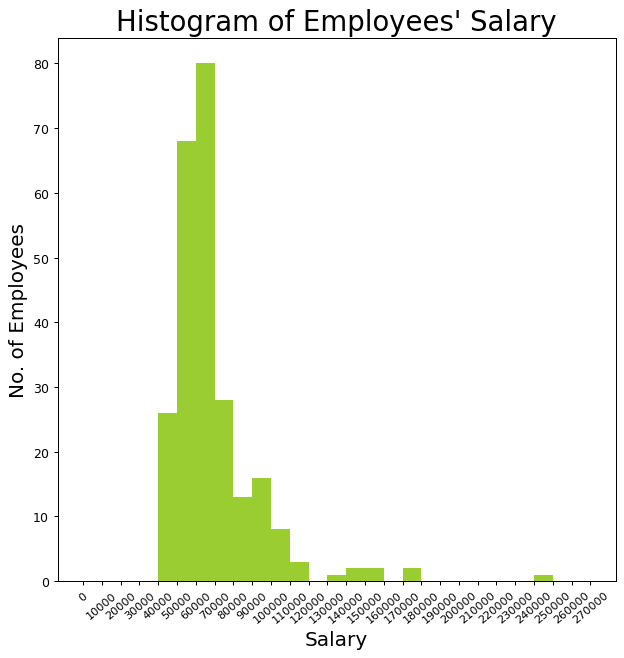

In [13]:
#plot histogram
bin_size = np.arange(0, 280000, 10000)
plt.figure(figsize=(8,8), dpi=90)
plt.hist(salary_bin, bins=bin_size, align="mid", color="yellowgreen")
plt.title("Histogram of Employees' Salary", fontsize=22)
plt.xlabel("Salary", fontsize=16)
plt.ylabel("No. of Employees", fontsize=16)
plt.xticks(bin_size,labels=bin_size, rotation=40, size=9)
plt.show()

### (c)

#### Find the length of service of all the staff, using Python. For staff who has not left the organization, use 1st May 2022 as the LeftDate. State the minimum, maximum and average length of service, expressing in years, rounded to 1 decimal place. (1 year is taken as 365 days.)

In [14]:
#print df
print(tmadf['JoinDate'])
print('---------------')
print(tmadf['LeftDate'])

0       4/2/2012
1      5/12/2014
2      9/29/2014
3       1/5/2016
4      7/11/2011
         ...    
245    2/16/2015
246    4/20/2017
247     1/5/2014
248    8/13/2012
249    3/30/2015
Name: JoinDate, Length: 250, dtype: object
---------------
0           NaN
1           NaN
2           NaN
3           NaN
4      9/6/2020
         ...   
245         NaN
246         NaN
247         NaN
248    9/1/2015
249         NaN
Name: LeftDate, Length: 250, dtype: object


In [15]:
#fill empty rows with 1st May 2022
tmadf['LeftDate'] = tmadf['LeftDate'].fillna('5/1/2022')
print(tmadf['LeftDate'])

0      5/1/2022
1      5/1/2022
2      5/1/2022
3      5/1/2022
4      9/6/2020
         ...   
245    5/1/2022
246    5/1/2022
247    5/1/2022
248    9/1/2015
249    5/1/2022
Name: LeftDate, Length: 250, dtype: object


In [16]:
#convert object to datetime format
tmadf[['JoinDate','LeftDate']] = tmadf[['JoinDate','LeftDate']].apply(pd.to_datetime)

#calculate difference between dates in days and assign to Service Lenth df
#tmadf['ServiceLength'] = round(((tmadf['LeftDate'] - tmadf['JoinDate']) / np.timedelta64(1, 'D'))/365,1)
tmadf['ServiceLength'] = ((tmadf['LeftDate'] - tmadf['JoinDate']) / np.timedelta64(1, 'D'))/365

#view updated df
print(tmadf['ServiceLength'])

0      10.084932
1       7.975342
2       7.591781
3       6.323288
4       9.164384
         ...    
245     7.208219
246     5.032877
247     8.323288
248     3.052055
249     7.093151
Name: ServiceLength, Length: 250, dtype: float64


In [17]:
#round off values
min_sl = round(tmadf['ServiceLength'].min(),1)
max_sl = round(tmadf['ServiceLength'].max(),1)
avg_sl = round(tmadf['ServiceLength'].mean(),1)

print('Minimum Service Length: ', min_sl)
print('Maximum Service Length: ', max_sl)
print('Average Service Length: ', avg_sl)

Minimum Service Length:  0.1
Maximum Service Length:  16.3
Average Service Length:  6.8


In [18]:
#answer
print(f'(c) For length of service of all the staff, the minimum is {min_sl} year(s), the maximum is {max_sl} year(s), and the average is {avg_sl} year(s).')

(c) For length of service of all the staff, the minimum is 0.1 year(s), the maximum is 16.3 year(s), and the average is 6.8 year(s).


### (d)

#### Develop an interactive user input which allows the user to query if a particular person was/is a staff of the organization. One can assume the full name is entered by the user. The output should print the answer to the user’s question if that person can be found in the organization’s records. The interactive user input should also allow the user to continue to make another query, till the user chooses otherwise.

In [19]:
#convert df to list
stafflist = tmadf['Staff'].values.tolist()
print(stafflist)

['Aairah Hastings', 'Aaminah Mcmillan', 'Aamna Howell', 'Aayan Ferrell', 'Ace Potter', 'Adaline Deacon', 'Addie Terrell', 'Adeeb Rice', 'Aleena Sierra', 'Alena Galvan', 'Alfie Hibbert', 'Allison Byers', 'Amarah Morris', 'Amy Jennings', 'Anabel Stevens', 'Anaya Fischer', 'Anees Wallis', 'Anish Hoover', 'Anish Patton', 'Annabell Rivers', 'Antonina Needham', 'Aroush Fernandez', 'Ashleigh Mccabe', 'Ashleigh Wilder', 'Ayat Stokes', 'Ayda Ramos', 'Ayisha York', 'Ayomide Beasley', 'Ayush Kouma', 'Bea Andrews', 'Becky Kent', 'Benn Bouvet', 'Blake Irvine', 'Blossom Oakley', 'Bobbi Hart', 'Brendon Blaese', 'Bushra Ware', 'Cai Barrow', 'Cally Branch', 'Carole Wilks', 'Charlize Noble', 'Chaya Page', 'Chelsey Watson', 'Chelsy Melton', 'Chloe Coleman', 'Cian Butt', 'Claude Alcock', 'Conan Russell', 'Cristian Dixon', 'Daanish Payne', 'Damien Garcia', 'Dania Ford', 'Daryl Jennings', 'Debra Bond', 'Declan Delgado', 'Deen Kerr', 'Denise Philip', 'Devin Sloan', 'Diesel Rahman', 'Dominic Holden', 'Dua San

In [21]:
#check staff program
valid_input = False

while valid_input == False:
    try:
        check_staff = str(input("Check Staff (Y/N):"))
        if check_staff == "Y" or check_staff == "y":
            enter_name = str(input("Please Enter Name: "))
            if enter_name in stafflist:
                print(f"{enter_name} is a staff!")
            elif enter_name not in stafflist:
                print(f"{enter_name} is not a staff!")
        elif check_staff == "N" or check_staff == "n":
            valid_input = True
            print("------------------------")
            print("Thanks! Exiting Program.")
        else:
            print("----------------")
            print("Please Try Again")
    except ValueError:
        print("Wrong")

Check Staff (Y/N):Y
Please Enter Name: Susannah Sumner
Susannah Sumner is a staff!
Check Staff (Y/N):Troy Vaughan
----------------
Please Try Again
Check Staff (Y/N):Munish
----------------
Please Try Again
Check Staff (Y/N):troy vaughan
----------------
Please Try Again
Check Staff (Y/N):n
------------------------
Thanks! Exiting Program.
